# The Ghost in the Machine


## Task 0: The Library of Babel


I downloaded two datasets from Project Gutenberg in text (Plain text utf-8), these are the following books:
1. The Interpretation of Dreams by Sigmund Freud
2. The Varieties by Religious Experience by William James

In [2]:
!nvidia-smi


Mon Feb  9 17:07:30 2026       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.288.01             Driver Version: 535.288.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8               3W /  30W |     10MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import re

### Text cleaning for Author - Sigmund Freud



In [4]:
# to get everything between actual start and end (include prefaces, contents, etc.)
def strip_gutenberg_junk(text):
    start_marker = [
        r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK .* \*\*\*",
    ]
    end_marker = [
        r"\*\*\* END OF (THIS|THE) PROJECT GUTENBERG EBOOK .* \*\*\*",
    ]

    start_idx = 0
    for pattern in start_marker:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            start_idx = match.end()
            break

    end_idx = len(text)
    for pattern in end_marker:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            end_idx = match.start()
            break

    return text[start_idx:end_idx].strip()

# to remove contents and prefaces and [x] references - for dreams one
def remove_contents_preface_references_extrachar_dream(text):
  start_marker = "THE SCIENTIFIC LITERATURE ON THE PROBLEMS OF THE DREAM[D]"
  idx = text.find(start_marker)

  # to start from the header of the first chapter
  text = text[idx:]

  # to remove references
  text = re.sub(r'\[[A-Z0-9]+\]', '', text)

  # _ is used to show italics in the text format
  text = text.replace('_', '')

  #remove standalone roman numerals (hoping they only appear in references and chapter headings)
  text = re.sub(r'(?m)^\s*[IVXLCDM]+\s*$', '', text)
  text = re.sub(r' +', ' ', text)

  # discovered there are citaitons like p. x or pp. x as well
  text = re.sub(r'\((p\.|pp\.)?\s?\d+\)', '', text)

  # also remove the ending footnotes and literary index part
  marker_pattern = r"LITERARY INDEX"

  # Search for the pattern
  end_match = re.search(marker_pattern, text)

  if end_match:
        print("Found")
        # Get the starting position of the match
        cutoff_index = end_match.start()
        # Return everything from the start up to that index
        text = text[:cutoff_index]

  # This turns all newlines/tabs into single spaces, making it a "clean stream" of prose
  text = re.sub(r'\s+', ' ', text)

  return text

In [5]:
text = ""
with open('sample_data/The Interpretation of Dreams.txt', 'r') as f:
   text = f.read()
   text = strip_gutenberg_junk(text)

  #  print("First few words:", text[10:])
  #  print("Last few words:", text[-10:])

   text = remove_contents_preface_references_extrachar_dream(text)

   print("First few words:", text[10:])
   print("Last few words:", text[-10:])

  # saving the cleaned text to refined_dreams.txt (i wish i had refined dreams, lite)
   with open('sample_data/refined_dreams.txt', 'w') as wf:
    wf.write(text)


Found
First few words: IFIC LITERATURE ON THE PROBLEMS OF THE DREAM In the following pages I shall prove that there exists a psychological technique by which dreams may be interpreted, and that upon the application of this method every dream will show itself to be a senseful psychological structure which may be introduced into an assignable place in the psychic activity of the waking state. I shall furthermore endeavour to explain the processes which give rise to the strangeness and obscurity of the dream, and to discover through them the nature of the psychic forces which operate, whether in combination or in opposition, to produce the dream. This accomplished, my investigation will terminate, as it will have reached the point where the problem of the dream meets with broader problems, the solution of which must be attempted through other material. I must presuppose that the reader is acquainted with the work done by earlier authors as well as with the present status of the dream prob

### Text cleaning for Author - William James

In [6]:
# to remove contents and prefaces and [x] references - for religious one
def remove_contents_preface_references_extrachar_religion(text):
  start_marker = "LECTURE I. RELIGION AND NEUROLOGY."
  idx = text.find(start_marker)

  # to start from the header of the first chapter
  text = text[idx:]

  # _ is used to show italics in the text format
  text = text.replace('_', '')

  # lots of '-------------' present
  text = re.sub(r'[-‐]{5,}', '', text)

  #remove standalone roman numerals (hoping they only appear in references and chapter headings)
  text = re.sub(r'(?m)^\s*[IVXLCDM]+\s*$', '', text)
  text = re.sub(r' +', ' ', text)

  # discovered there are citaitons like p. x or pp. x as well
  text = re.sub(r'\((p\.|pp\.)?\s?\d+\)', '', text)

  # makes our lives easier (I hope?) by removing '-' which is used for splitting word.
  text = re.sub(r'(\w+)-\s+(\w+)', r'\1\2', text)

  # also remove the ending footnotes and literary index part
  marker_pattern = r"INDEX"

  # Search for the pattern
  end_match = re.search(marker_pattern, text)

  if end_match:
        print("Found")
        # Get the starting position of the match
        cutoff_index = end_match.start()
        # Return everything from the start up to that index
        text = text[:cutoff_index]

  # This turns all newlines/tabs into single spaces, making it a "clean stream" of prose
  text = re.sub(r'\s+', ' ', text)

  return text

In [7]:
text = ""
with open('sample_data/The Varieties of Religious Experience.txt', 'r') as f:
  text = f.read()
  text = strip_gutenberg_junk(text)

  text = remove_contents_preface_references_extrachar_religion(text)

  print("First few words:", text[10:])
  print("Last few words:", text[-10:])

  # saving the cleaned text to refined_religions.txt (refined religions? I dont think we need it (or do we?))
  with open('sample_data/refined_religions.txt', 'w') as wf:
    wf.write(text)


Found
First few words:  RELIGION AND NEUROLOGY. It is with no small amount of trepidation that I take my place behind this desk, and face this learned audience. To us Americans, the experience of receiving instruction from the living voice, as well as from the books, of European scholars, is very familiar. At my own University of Harvard, not a winter passes without its harvest, large or small, of lectures from Scottish, English, French, or German representatives of the science or literature of their respective countries whom we have either induced to cross the ocean to address us, or captured on the wing as they were visiting our land. It seems the natural thing for us to listen whilst the Europeans talk. The contrary habit, of talking whilst the Europeans listen, we have not yet acquired; and in him who first makes the adventure it begets a certain sense of apology being due for so presumptuous an act. Particularly must this be the case on a soil as sacred to the American imagination

Finally forming Class 1:

In [8]:
def create_chunks(text, label, author, words_per_chunk=150):
    words = text.split()
    chunks = []
    for i in range(0, len(words), words_per_chunk):
        chunk_words = words[i : i + words_per_chunk]
        if len(chunk_words) > 100:
            chunks.append({
                "text": " ".join(chunk_words),
                "label": "Human",
                "author": author,
                "class": 1
            })
    return chunks

In [9]:
step2_freud = ""
step2_james = ""
with open('sample_data/refined_dreams.txt', 'r') as f:
  step2_freud = f.read()
with open('sample_data/refined_religions.txt', 'r') as f:
  step2_james = f.read()
class1_freud_chunks = create_chunks(step2_freud, "Human", "Freud")
class1_james_chunks = create_chunks(step2_james, "Human", "James")

print(f"Total Freud chunks: {len(class1_freud_chunks)}")
print(f"Total James chunks: {len(class1_james_chunks)}")

Total Freud chunks: 1232
Total James chunks: 1026


### Topic Extraction

I will be using Tf-Idf for extracting the topics. Why? For one reason I havent read the books, and am not planning to for now. Second, because Tf (the frequency term) with the Idf (the uniqueness term) will filter out keywords and give me the repetitive yet 'significant' keywords. Reptitive but significant, with some logical sense to connect the, that is what a core topic is right? Let's see.

Result: (I ultimately gave these keywords to an ai and the book names, and asked it to give me topic names for common themes in both the books)

In [10]:
# import the libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [11]:
def get_top_tfidf_features(chunks, n_features=10):
    # combining chunks to get a text string
    corpus = [" ".join([c['text'] for c in chunks])]

    # sublinear_tf=True to scale the counts logarithmically, to normalise out
    # the obsessive words
    vectorizer = TfidfVectorizer(stop_words='english',
                                 max_features=n_features,
                                 sublinear_tf=True)

    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()

    return list(feature_names)

# Run for both authors
freud_keywords = get_top_tfidf_features(class1_freud_chunks)
james_keywords = get_top_tfidf_features(class1_james_chunks)

print(f"Freud's Unique Vocabulary: {freud_keywords}")
print(f"James's Unique Vocabulary: {james_keywords}")

Freud's Unique Vocabulary: ['content', 'day', 'dream', 'dreams', 'life', 'psychic', 'thought', 'thoughts', 'time', 'wish']
James's Unique Vocabulary: ['god', 'life', 'man', 'mind', 'religion', 'religious', 'things', 'time', 'way', 'world']


Hmm, I got extremely similar words, not necessarily distinct 10 words. Let's lemmatize and try getting those 10 keywords again!

In [12]:
import spacy

In [13]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc
              if not token.is_stop and not token.is_punct and token.pos_ != 'PRON'] # lowercasing and removing punctuation
    return " ".join(lemmas)

for chunk in class1_freud_chunks:
    chunk['lemmatized_text'] = lemmatize_text(chunk['text'])

for chunk in class1_james_chunks:
    chunk['lemmatized_text'] = lemmatize_text(chunk['text'])

In [14]:
def get_top_tfidf_features(chunks, n_features=15):
    # combining chunks to get a text string
    corpus = [" ".join([c['lemmatized_text'] for c in chunks])] #notice this time we used lemmatized text

    # sublinear_tf=True to scale the counts logarithmically, to normalise out
    # the obsessive words
    vectorizer = TfidfVectorizer(stop_words='english',
                                 max_features=n_features,
                                 sublinear_tf=True)

    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()

    return list(feature_names)

In [15]:
freud_keywords = get_top_tfidf_features(class1_freud_chunks)
james_keywords = get_top_tfidf_features(class1_james_chunks)

print(f"Freud's Unique Vocabulary: {freud_keywords}")
print(f"James's Unique Vocabulary: {james_keywords}")

Freud's Unique Vocabulary: ['case', 'child', 'content', 'day', 'dream', 'interpretation', 'know', 'life', 'material', 'person', 'psychic', 'sleep', 'thought', 'time', 'wish']
James's Unique Vocabulary: ['come', 'experience', 'feel', 'god', 'know', 'life', 'man', 'mind', 'religion', 'religious', 'say', 'thing', 'time', 'way', 'world']


So the topics are finally:
1. Consciousness and Personal Meaning
2. The Temporal Structure of Mental Life
3. Feeling and the Grounds of Belief
4. Wish, Faith, and Human Conduct
5. Psychic Reality and Lived Experience
6. Dreams and Religious Awakening
7. The Individual and the Universal Mind

I'll be using gemma 'cause we need api credits for gemini models' api :(

In [16]:
# import os
# import time
# import random
# import pandas as pd
# from collections import deque
# from google import genai
# from google.colab import userdata

# # ---------------- CONFIG ---------------- #

# API_KEY = userdata.get('GEMINI_API_KEY')

# TOPICS = [
#     "Consciousness and Personal Meaning",
#     "The Temporal Structure of Mental Life",
#     "Feeling and the Grounds of Belief",
#     "Wish, Faith, and Human Conduct",
#     "Psychic Reality and Lived Experience",
#     "Dreams and Religious Awakening",
#     "The Individual and the Universal Mind"
# ]

# SAMPLES_PER_TOPIC = 72
# MODEL_NAME = "gemini-1.5-flash"

# # Conservative free-tier assumption
# MAX_RPM = 15          # requests per minute
# BASE_SLEEP = 4       # base sleep between successful calls
# OUTPUT_FILE = "class2.csv"

# # -------------------------------------- #

# client = genai.Client(api_key=API_KEY)

# df_c2 = pd.DataFrame(columns=["text", "label", "class", "topic"])

# # For RPM tracking
# timestamps = deque()

# def throttle():
#     """Ensure we stay under RPM."""
#     now = time.time()

#     while timestamps and now - timestamps[0] > 60:
#         timestamps.popleft()

#     if len(timestamps) >= MAX_RPM:
#         wait = 60 - (now - timestamps[0])
#         print(f"RPM limit hit — sleeping {wait:.1f}s")
#         time.sleep(wait)

# def valid_paragraph(text):
#     """Reject empty / short / weird generations."""
#     if not text:
#         return False

#     words = text.split()
#     if len(words) < 80:      # enforce minimum size
#         return False

#     if len(words) > 250:    # prevent rambly overflow
#         return False

#     return True

# # ---------------- MAIN LOOP ---------------- #

# for topic in TOPICS:
#     count = 0
#     backoff = 20

#     print(f"\nStarting topic: {topic}")

#     while count < SAMPLES_PER_TOPIC:

#         try:
#             throttle()

#             prompt = f"""
# Write a ~150-word paragraph about {topic}.
# Use a neutral, modern, objective AI tone.
# Avoid lists or bullet points.
# Single coherent paragraph only.
# """

#             res = client.models.generate_content(
#                 model=MODEL_NAME,
#                 contents=prompt,
#                 config=genai.types.GenerateContentConfig(
#                     temperature=1.0,
#                     top_p=0.95
#                 )
#             )

#             timestamps.append(time.time())

#             if res.text and valid_paragraph(res.text):

#                 df_c2 = pd.concat([
#                     df_c2,
#                     pd.DataFrame([{
#                         "text": res.text.strip(),
#                         "label": "AI",
#                         "class": 2,
#                         "topic": topic
#                     }])
#                 ], ignore_index=True)

#                 count += 1
#                 backoff = 20  # reset backoff after success

#                 df_c2.to_csv(OUTPUT_FILE, index=False)

#                 print(f"C2: {topic} [{count}/{SAMPLES_PER_TOPIC}]")

#             else:
#                 print("Rejected malformed paragraph.")

#             # jittered sleep
#             time.sleep(BASE_SLEEP + random.random() * 2)

#         except Exception as e:
#             print(f"Error: {e}")
#             print(f"Backing off for {backoff}s")

#             time.sleep(backoff)
#             backoff = min(backoff * 2, 180)  # exponential backoff cap

# print("\nDONE. Exact counts guaranteed.")


I tried a lot with gemma as well, but even with a temperature of 2.0, it is giving out very determinsitic output, meaning all my paragraphs from a topic were almost the same.

So now I am shifting from api based framework to using transformers based framework. I'll try qwen 3 8b.

In [17]:
!pip install transformers accelerate torch pandas



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [18]:
# import torch
# import time
# import random
# import pandas as pd
# from transformers import AutoTokenizer, AutoModelForCausalLM

# # ---------------- CONFIG ---------------- #

# MODEL_NAME = "Qwen/Qwen2.5-3B-Instruct"

# TOPICS = [
#     "Consciousness and Personal Meaning",
#     "The Temporal Structure of Mental Life",
#     "Feeling and the Grounds of Belief",
#     "Wish, Faith, and Human Conduct",
#     "Psychic Reality and Lived Experience",
#     "Dreams and Religious Awakening",
#     "The Individual and the Universal Mind"
# ]

# SAMPLES_PER_TOPIC = 72
# OUTPUT_FILE = "class2.csv"

# # -------------------------------------- #

# print("Loading model...")

# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# model = AutoModelForCausalLM.from_pretrained(
#     MODEL_NAME,
#     torch_dtype=torch.float16,      # IMPORTANT: keeps everything on GPU
#     device_map="auto",
#     low_cpu_mem_usage=True
# )

# df = pd.DataFrame(columns=["text", "label", "class", "topic"])

# def valid_paragraph(text):
#     w = text.split()
#     return 80 <= len(w) <= 250

# # ---------------- MAIN LOOP ---------------- #

# for topic in TOPICS:
#     count = 0
#     print(f"\nTopic: {topic}")

#     while count < SAMPLES_PER_TOPIC:

#         prompt = f"""
# Write a ~150-word paragraph about {topic}.
# Use a neutral, modern, objective AI tone.
# Avoid lists or bullet points.
# Single coherent paragraph only.
# """

#         messages = [{"role": "user", "content": prompt}]

#         inputs = tokenizer.apply_chat_template(
#             messages,
#             add_generation_prompt=True,
#             tokenize=True,
#             return_tensors="pt"
#         ).to(model.device)

#         print("Generating paragraph...")

#         outputs = model.generate(
#             **inputs,
#             max_new_tokens=300,
#             temperature=1.0,
#             top_p=0.95,
#             do_sample=True
#         )

#         prompt_len = inputs["input_ids"].shape[-1]
#         text = tokenizer.decode(
#             outputs[0][prompt_len:],
#             skip_special_tokens=True
#         ).strip()

#         wc = len(text.split())
#         print(f"Generated ({wc} words)")

#         if valid_paragraph(text):

#             df = pd.concat([
#                 df,
#                 pd.DataFrame([{
#                     "text": text,
#                     "label": "AI",
#                     "class": 2,
#                     "topic": topic
#                 }])
#             ], ignore_index=True)

#             count += 1
#             df.to_csv(OUTPUT_FILE, index=False)

#             print(f"✅ Saved {count}/{SAMPLES_PER_TOPIC} for {topic}")
#             print(f"📊 Total rows: {len(df)}")

#         else:
#             print("❌ Rejected (outside word range)")

#         time.sleep(0.5 + random.random())

# print("\nDONE.")


Class 3:
Same thing but with a different prompt, and with different authors' style.

Plan ahead: Generate 36 paras of each author in each topic.

In [19]:
# import torch
# import time
# import random
# import pandas as pd
# from transformers import AutoTokenizer, AutoModelForCausalLM

# MODEL_NAME = "Qwen/Qwen2.5-3B-Instruct"

# TOPICS = [
#     "Consciousness and Personal Meaning",
#     "The Temporal Structure of Mental Life",
#     "Feeling and the Grounds of Belief",
#     "Wish, Faith, and Human Conduct",
#     "Psychic Reality and Lived Experience",
#     "Dreams and Religious Awakening",
#     "The Individual and the Universal Mind"
# ]

# AUTHORS = {
#     "Freud": "Write in the analytical, clinical, introspective style of early psychoanalytic writing, focusing on unconscious processes, inner conflict, and symbolic meaning.",
#     "William James": "Write in the reflective, philosophical, experiential style of William James, emphasizing lived experience, pragmatism, and personal meaning."
# }

# SAMPLES_PER_TOPIC = 36
# OUTPUT_FILE = "class3.csv"

# print("Loading model...")

# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# model = AutoModelForCausalLM.from_pretrained(
#     MODEL_NAME,
#     torch_dtype=torch.float16,
#     device_map={"": "cuda"},   # force GPU
# )

# df = pd.DataFrame(columns=["text", "style", "label", "class", "topic"])

# def valid_paragraph(text):
#     w = text.split()
#     return 80 <= len(w) <= 250

# # ---------------- MAIN LOOP ---------------- #

# for topic in TOPICS:
#     print(f"\nTopic: {topic}")

#     for author, style_prompt in AUTHORS.items():
#         count = 0
#         print(f"\nAuthor style: {author}")

#         while count < SAMPLES_PER_TOPIC:

#             prompt = f"""
# {style_prompt}

# Write a ~150-word paragraph about {topic}.
# Use a neutral academic tone appropriate to this author.
# Avoid lists or bullet points.
# Single coherent paragraph only.
# Do not mention the author by name.
# """

#             messages = [{"role": "user", "content": prompt}]

#             inputs = tokenizer.apply_chat_template(
#                 messages,
#                 add_generation_prompt=True,
#                 tokenize=True,
#                 return_tensors="pt"
#             ).to("cuda")

#             print("Generating paragraph...")

#             with torch.no_grad():
#                 outputs = model.generate(
#                     **inputs,
#                     max_new_tokens=300,
#                     temperature=1.0,
#                     top_p=0.95,
#                     do_sample=True
#                 )

#             prompt_len = inputs["input_ids"].shape[-1]
#             text = tokenizer.decode(
#                 outputs[0][prompt_len:],
#                 skip_special_tokens=True
#             ).strip()

#             wc = len(text.split())
#             print(f"Generated ({wc} words)")

#             if valid_paragraph(text):

#                 df = pd.concat([
#                     df,
#                     pd.DataFrame([{
#                         "text": text,
#                         "style": author,
#                         "label": "AI",
#                         "class": 3,
#                         "topic": topic
#                     }])
#                 ], ignore_index=True)

#                 count += 1
#                 df.to_csv(OUTPUT_FILE, index=False)

#                 print(f"✅ Saved {count}/{SAMPLES_PER_TOPIC} for {topic} ({author})")
#                 print(f"📊 Total rows: {len(df)}")

#             else:
#                 print("❌ Rejected (outside word range)")

#             time.sleep(0.5 + random.random())

# print("\nDONE.")


## Task 1

In [20]:
pip install pandas spacy textstat matplotlib seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Importing stuff again because I forgot what I imported yesterday.

In [21]:
!pip install textstat spacy


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import pandas as pd
import re
import random
import nltk
from collections import Counter
import textstat
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
nltk.download('punkt')  # punkt for tokenising
nltk.download('punkt_tab')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /home/shrawani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/shrawani/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Let's clean text again, and for the sampling 5000 words part, I'll just randomly select the 5000 contiguous word sample.

In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-z\s.,;:!?—-]', '', text)
    return text.strip()

def sample_5000_words(texts):
    all_words = " ".join(texts).split()
    if len(all_words) <= 5000:
        return " ".join(all_words)
    start = random.randint(0, len(all_words) - 5000)
    return " ".join(all_words[start:start+5000])


Calculates ttr and hapax

In [24]:
def lexical_metrics(text):
    words = nltk.word_tokenize(text)
    words = [w for w in words if w.isalpha()]

    total = len(words)
    unique = len(set(words))

    ttr = unique / total

    counts = Counter(words)
    hapax = sum(1 for w in counts if counts[w] == 1)

    return {
        "total_words": total,
        "unique_words": unique,
        "TTR": ttr,
        "hapax": hapax
    }


Calculates tree depth and the POS ratio.

In [25]:
def tree_depth(token):
    if not list(token.children):
        return 1
    return 1 + max(tree_depth(child) for child in token.children)

def syntactic_metrics(text):
    doc = nlp(text)

    adj = 0
    noun = 0
    depths = []

    for sent in doc.sents:
        root = sent.root
        depths.append(tree_depth(root))

    for token in doc:
        if token.pos_ == "ADJ":
            adj += 1
        if token.pos_ in ["NOUN", "PROPN"]:
            noun += 1

    return {
        "adj_noun_ratio": adj / noun if noun > 0 else 0,
        "avg_tree_depth": sum(depths) / len(depths)
    }


In [26]:
PUNCT = [';', '—', '!', ':', '?', ',']

def punctuation_density(text):
    counts = {p: text.count(p) for p in PUNCT}
    total_chars = len(text)

    return {k: v / total_chars for k, v in counts.items()}


In [27]:
def readability(text):
    return textstat.flesch_kincaid_grade(text)


In [28]:
class1_texts = [x["text"] for x in class1_freud_chunks + class1_james_chunks]
class1_sample = sample_5000_words([clean_text(t) for t in class1_texts])

df2 = pd.read_csv("class2.csv")
class2_sample = sample_5000_words([clean_text(t) for t in df2.text])

df3 = pd.read_csv("class3.csv")
class3_sample = sample_5000_words([clean_text(t) for t in df3.text])


In [29]:
def full_analysis(text):
    out = {}
    out.update(lexical_metrics(text))
    out.update(syntactic_metrics(text))
    out.update(punctuation_density(text))
    out["flesch_kincaid"] = readability(text)
    return out

results = {
    "Human": full_analysis(class1_sample),
    "AI": full_analysis(class2_sample),
    "AI_Style": full_analysis(class3_sample)
}

pd.DataFrame(results).T


,total_words,unique_words,TTR,hapax,adj_noun_ratio,avg_tree_depth,;,—,!,:,?,",",flesch_kincaid
Human,4948.0,1332.0,0.269200,806.0,0.320380,7.542105,0.000874,0.000769,0.00007,0.000734,0.00014,0.008742,12.392071
AI,4930.0,843.0,0.170994,409.0,0.528104,8.043902,0.000135,0.000216,0.00000,0.000000,0.00000,0.010447,19.147664
AI_Style,4981.0,1033.0,0.207388,528.0,0.436170,8.005000,0.000429,0.000229,0.00000,0.000029,0.00000,0.009727,17.090813


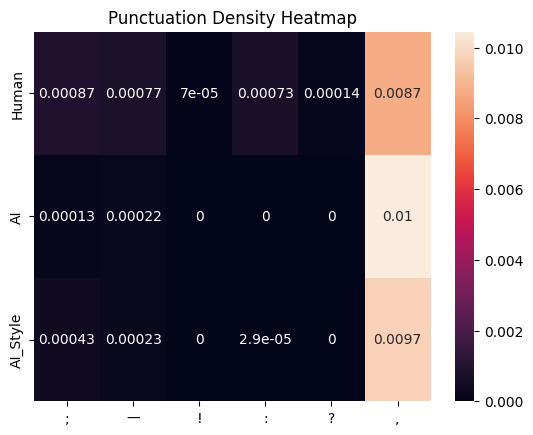

In [30]:
punct_df = pd.DataFrame({
    k: [results["Human"][k], results["AI"][k], results["AI_Style"][k]]
    for k in PUNCT
}, index=["Human", "AI", "AI_Style"])

sns.heatmap(punct_df, annot=True)
plt.title("Punctuation Density Heatmap")
plt.show()


### Are these classes distinct?

I have analyzed a sample of almost 5000 words from each class.

TTR:
Class 1 has the highest TTR, implying how these authors have chose unique words more often. Considering the books I took were academic, this seems expected.

Hapax:
Class 1 wins again here. The authors tend to us more unique words (as shown in the above part as well).

POS ratio:
The ratio is the least for class 1.
AI does look like it is trying to overdescribe.

Punctuation Density:
The authors have used more punctuations than AI (except the em-dashes). AI likes em-dashes.

Dependency Tree Depth:
AI seems to be more4 complex, since it has more depth. Let's try and see what is the variance and mean to get a clear idea.

In [31]:
import numpy as np

def tree_depth_stats(text):
    doc = nlp(text)
    depths = []

    for sent in doc.sents:
        depths.append(tree_depth(sent.root))

    return np.mean(depths), np.std(depths)

human_mean, human_std = tree_depth_stats(class1_sample)
ai_mean, ai_std = tree_depth_stats(class2_sample)
style_mean, style_std = tree_depth_stats(class3_sample)

depth_df = pd.DataFrame({
    "Mean Tree Depth": [human_mean, ai_mean, style_mean],
    "Std Dev Tree Depth": [human_std, ai_std, style_std]
}, index=["Human", "AI", "AI_Style"])

depth_df

,Mean Tree Depth,Std Dev Tree Depth
Human,7.542105,2.776938
AI,8.043902,2.086665
AI_Style,8.005000,1.845257


AI uses more nested sentences, but humans have more variance.
This shows that AI usually follow a uniform structure, whereas humans tend to write varied sentences/texts.

## Task 2

In [32]:
# Let's install some more libraries (may be imported earlier)
!pip install scikit-learn torch transformers peft datasets gensim



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


### Tier A - The Statistician

In [33]:
def extract_features(text):
    out = {}
    out.update(lexical_metrics(text))
    out.update(syntactic_metrics(text))
    out.update(punctuation_density(text))
    out["flesch"] = readability(text)

    return out


Instead of finding metrics for only 5000 word sample, we opt to do it for all of the dataset.


In [34]:
rows = []

# Class 1 (human)
for x in class1_freud_chunks + class1_james_chunks:
    feats = extract_features(clean_text(x["text"]))
    feats["label"] = "class1"
    rows.append(feats)

# Class 2
df2 = pd.read_csv("class2.csv")
for t in df2.text:
    feats = extract_features(clean_text(t))
    feats["label"] = "class2"
    rows.append(feats)

# Class 3
df3 = pd.read_csv("class3.csv")
for t in df3.text:
    feats = extract_features(clean_text(t))
    feats["label"] = "class3"
    rows.append(feats)

df = pd.DataFrame(rows)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(["label", "total_words"], axis=1)
y = LabelEncoder().fit_transform(df["label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       462
           1       0.82      0.65      0.73       101
           2       0.65      0.75      0.70        91

    accuracy                           0.90       654
   macro avg       0.82      0.80      0.80       654
weighted avg       0.91      0.90      0.90       654



Here, 0 mean class 1, 1 means class 2, 2 means class 3. (Let's cut some slack for the zero-indexed system?)

Humans have a very high f1-score. This could be because of high the punctuation density was so different for human vs ai classes according to the heatmap.

### Tier B - The Semanticist


I will use Glove embeddings.

In [36]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip


In [37]:
# !pip install gensim

In [38]:
from gensim.models import KeyedVectors

glove = KeyedVectors.load_word2vec_format("glove.6B.300d.txt", binary=False, no_header=True)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

def embed_tfidf(text, row):
    words = text.split()
    vec = np.zeros(300)
    weight_sum = 0

    for w in words:
        if w in glove and w in vocab:
            idx = vocab[w]
            weight = tfidf[row, idx]
            vec += glove[w] * weight
            weight_sum += weight

    if weight_sum > 0:
        vec /= weight_sum

    return vec




In [40]:
import numpy as np

In [41]:
texts = []
labels = []

for x in class1_freud_chunks + class1_james_chunks:
    texts.append(clean_text(x["text"]))
    labels.append(0)

for t in df2.text:
    texts.append(clean_text(t))
    labels.append(1)

for t in df3.text:
    texts.append(clean_text(t))
    labels.append(2)



vectorizer = TfidfVectorizer(max_features=5000)
tfidf = vectorizer.fit_transform(texts)
vocab = vectorizer.vocabulary_

X = np.array([embed_tfidf(t,i) for i,t in enumerate(texts)])
y = np.array(labels)


In [42]:
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)


In [43]:
!pip install sympy==1.12


  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.12 which is incompatible.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [44]:

class FFNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(300,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,64),
            nn.ReLU(),
            nn.Linear(64,3)
        )

    def forward(self,x):
        return self.net(x)

model = FFNN()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(30):
    opt.zero_grad()
    loss = loss_fn(model(X_train), y_train)
    loss.backward()
    opt.step()

model.eval()
with torch.no_grad():
    preds = model(X_test).argmax(dim=1)

print(classification_report(y_test.numpy(), preds.numpy()))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       454
           1       0.60      0.95      0.74        98
           2       1.00      0.01      0.02       102

    accuracy                           0.84       654
   macro avg       0.84      0.65      0.57       654
weighted avg       0.88      0.84      0.78       654



### Tier C - The Transformer (LoRA)





In [45]:
!pip install datasets peft

  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [46]:
from datasets import Dataset

data = {
    "text": texts,
    "label": labels
}

ds = Dataset.from_dict(data)

ds = ds.train_test_split(test_size=0.2, seed=42)

train_ds = ds["train"]
test_ds = ds["test"]


In [47]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.5.1+cu121
True


In [48]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3
)


Loading weights: 100%|█| 100/100 [00:00<00:00, 370.48it/s, Materializing param=d
DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.bias    | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
classifier.bias         | MISSING    | 
pre_classifier.bias     | MISSING    | 
pre_classifier.weight   | MISSING    | 
classifier.weight       | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


In [49]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_lin", "v_lin"],
    lora_dropout=0.1,
    bias="none",
    task_type="SEQ_CLS"
)

model = get_peft_model(model, config)


In [50]:
def tok(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length")

train_ds = train_ds.map(tok, batched=True)
test_ds = test_ds.map(tok, batched=True)

train_ds.set_format(type="torch", columns=["input_ids","attention_mask","label"])
test_ds.set_format(type="torch", columns=["input_ids","attention_mask","label"])


Map: 100%|███████████████████████████| 654/654 [00:00<00:00, 1313.28 examples/s]


In [ ]:
print(test_ds.size)

In [51]:
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)

    print(classification_report(labels, preds))

    return {
        "accuracy": accuracy_score(labels, preds)
    }

args = TrainingArguments(
    output_dir="./out",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    logging_steps=50,
    save_strategy="no",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)

trainer.train()

print("\nFinal Evaluation:")
trainer.evaluate()


Step,Training Loss
50,0.751151
100,0.306237
150,0.164853
200,0.140275
250,0.127789
300,0.124532
350,0.094152
400,0.091886
450,0.093125
500,0.099538



Final Evaluation:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       0.85      0.92      0.88       112
           2       0.91      0.84      0.87       112

    accuracy                           0.96       654
   macro avg       0.92      0.92      0.92       654
weighted avg       0.96      0.96      0.96       654



{'eval_loss': 0.09330801665782928,
 'eval_accuracy': 0.9587155963302753,
 'eval_runtime': 24.4968,
 'eval_samples_per_second': 26.697,
 'eval_steps_per_second': 3.347,
 'epoch': 2.0}

Training and evaluation losses remained closely aligned (~0.09), indicating minimal overfitting. High test accuracy across all classes suggests effective generalization enabled by LoRA-based parameter-efficient fine-tuning.

### Task 3 - The Smoking Gun


In [53]:
!pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.2 MB/s  0:00:00

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [54]:
import numpy as np
import torch

model.eval()

outputs = trainer.predict(test_ds)

logits = outputs.predictions
labels = outputs.label_ids
preds = np.argmax(logits, axis=1)
probs = torch.softmax(torch.tensor(logits), dim=1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       0.85      0.92      0.88       112
           2       0.91      0.84      0.87       112

    accuracy                           0.96       654
   macro avg       0.92      0.92      0.92       654
weighted avg       0.96      0.96      0.96       654



In [61]:
# checking if human written paragraphs are there in the dataset.
train_labels = train_ds["label"]
test_labels = test_ds["label"]

print("Train:", dict(zip(*np.unique(train_labels, return_counts=True))))
print("Test:", dict(zip(*np.unique(test_labels, return_counts=True))))


Train: {0: 1828, 1: 392, 2: 392}
Test: {0: 430, 1: 112, 2: 112}


Interestingly, the model can perfectly detect human paragraphs in the test dataset as well.

So, we dont have an imposter paragraph for human written para labelled as AI.

Human samples were drawn from two authors, leading to strong intra-author coherence. This likely inflated human classification performance, and future work should evaluate cross-author generalization.

So, let's analyze the AI generated paragraphs that have been labelled as human written.

In [99]:
# to make it less confusing
HUMAN = 0
AI_1 = 1
AI_2 = 2

In [108]:
# Let's see what the model actually did
from collections import Counter

pairs = Counter(zip(labels, preds))
pairs


Counter({(0, 0): 430, (1, 1): 103, (2, 2): 94, (2, 1): 18, (1, 2): 9})

Well, the model can distinguish between ai and human. Did I leak test and train datasets into each other? Below cell shows no.

In [109]:
train_texts = set(ds["train"]["text"])
test_texts = set(ds["test"]["text"])

print(len(train_texts & test_texts))


0


So turns out my promoting style was not effective to generate the AI paragraphs. So the model chose to differentiate the AI-style vs. 1900-isms.

So, no smoking gun (or was this a gun, just not smoking enough)? I will try to do this with other datasets, Im not sure of I'll be able to submit it on time.

Hence skipping task 3 as of now.

No Task 4 as of now as well :(

# Attempt 2, same worksflow, just different datasets.

In [1]:
!nvidia-smi

Mon Feb  9 15:03:01 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

So there seems to be a prompting issue while generating the paras from AI. Let's generate the paras such that within each topic, there is variation focussing on different themes. And avoid mentioning neutral, objective ai tone.


### 1. Generating AI datasets

(the topics recognition is done above using tfidf)

In [ ]:
import torch
import time
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM

MODEL_NAME = "Qwen/Qwen2.5-3B-Instruct"
TOPICS = ["Consciousness and Personal Meaning", "The Temporal Structure of Mental Life", "Feeling and the Grounds of Belief", "Wish, Faith, and Human Conduct", "Psychic Reality and Lived Experience", "Dreams and Religious Awakening", "The Individual and the Universal Mind"]
THEMES = ["historical and philosophical origins", "modern psychological implications", "personal and introspective narratives", "societal and cultural impacts"]
SAMPLES_PER_THEME = 18
OUTPUT_FILE = "class2_themed.csv"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME, dtype=torch.float16, device_map="auto")

df = pd.DataFrame(columns=["text", "label", "class", "topic"])

for topic in TOPICS:
    print(f"\n>>> Starting Topic: {topic}")
    for theme in THEMES:
        count = 0
        while count < SAMPLES_PER_THEME:
            prompt = f"Write a ~150-word paragraph about {topic} focusing on {theme}. Single paragraph. No lists."
            messages = [{"role": "user", "content": prompt}]

            inputs = tokenizer.apply_chat_template(messages, add_generation_prompt=True, return_tensors="pt").to(model.device)

            outputs = model.generate(
                **inputs, # UNPACKED HERE
                max_new_tokens=300,
                temperature=1.0,
                top_p=0.95,
                do_sample=True
            )

            text = tokenizer.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True).strip()

            if 80 <= len(text.split()) <= 250:
                df = pd.concat([df, pd.DataFrame([{"text": text, "label": "AI", "class": 2, "topic": topic}])], ignore_index=True)
                count += 1
                df.to_csv(OUTPUT_FILE, index=False)
                print(f"    ✅ {theme} [{count}/{SAMPLES_PER_THEME}]")

print("DONE.")

Loading weights:   0%|          | 0/434 [00:00<?, ?it/s]


>>> Starting Topic: Consciousness and Personal Meaning
    ✅ historical and philosophical origins [1/18]
    ✅ historical and philosophical origins [2/18]
    ✅ historical and philosophical origins [3/18]
    ✅ historical and philosophical origins [4/18]
    ✅ historical and philosophical origins [5/18]
    ✅ historical and philosophical origins [6/18]
    ✅ historical and philosophical origins [7/18]
    ✅ historical and philosophical origins [8/18]
    ✅ historical and philosophical origins [9/18]
    ✅ historical and philosophical origins [10/18]
    ✅ historical and philosophical origins [11/18]
    ✅ historical and philosophical origins [12/18]
    ✅ historical and philosophical origins [13/18]
    ✅ historical and philosophical origins [14/18]
    ✅ historical and philosophical origins [15/18]
    ✅ historical and philosophical origins [16/18]
    ✅ historical and philosophical origins [17/18]
    ✅ historical and philosophical origins [18/18]
    ✅ modern psychological implicat

In [ ]:
# generating ai paras mimicking human style.

## Cleaning books data and forming chunks.

In [ ]:
# to get everything between actual start and end (include prefaces, contents, etc.)
def strip_gutenberg_junk(text):
    start_marker = [
        r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK .* \*\*\*",
    ]
    end_marker = [
        r"\*\*\* END OF (THIS|THE) PROJECT GUTENBERG EBOOK .* \*\*\*",
    ]

    start_idx = 0
    for pattern in start_marker:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            start_idx = match.end()
            break

    end_idx = len(text)
    for pattern in end_marker:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            end_idx = match.start()
            break

    return text[start_idx:end_idx].strip()

# to remove contents and prefaces and [x] references - for dreams one
def remove_contents_preface_references_extrachar_dream(text):
  start_marker = "THE SCIENTIFIC LITERATURE ON THE PROBLEMS OF THE DREAM[D]"
  idx = text.find(start_marker)

  # to start from the header of the first chapter
  text = text[idx:]

  # to remove references
  text = re.sub(r'\[[A-Z0-9]+\]', '', text)

  # _ is used to show italics in the text format
  text = text.replace('_', '')

  #remove standalone roman numerals (hoping they only appear in references and chapter headings)
  text = re.sub(r'(?m)^\s*[IVXLCDM]+\s*$', '', text)
  text = re.sub(r' +', ' ', text)

  # discovered there are citaitons like p. x or pp. x as well
  text = re.sub(r'\((p\.|pp\.)?\s?\d+\)', '', text)

  # also remove the ending footnotes and literary index part
  marker_pattern = r"LITERARY INDEX"

  # Search for the pattern
  end_match = re.search(marker_pattern, text)

  if end_match:
        print("Found")
        # Get the starting position of the match
        cutoff_index = end_match.start()
        # Return everything from the start up to that index
        text = text[:cutoff_index]

  # This turns all newlines/tabs into single spaces, making it a "clean stream" of prose
  text = re.sub(r'\s+', ' ', text)

  return text

text = ""
with open('sample_data/The Interpretation of Dreams.txt', 'r') as f:
   text = f.read()
   text = strip_gutenberg_junk(text)

  #  print("First few words:", text[10:])
  #  print("Last few words:", text[-10:])

   text = remove_contents_preface_references_extrachar_dream(text)

   print("First few words:", text[10:])
   print("Last few words:", text[-10:])

  # saving the cleaned text to refined_dreams.txt (i wish i had refined dreams, lite)
   with open('sample_data/refined_dreams.txt', 'w') as wf:
    wf.write(text)

# to remove contents and prefaces and [x] references - for religious one
def remove_contents_preface_references_extrachar_religion(text):
  start_marker = "LECTURE I. RELIGION AND NEUROLOGY."
  idx = text.find(start_marker)

  # to start from the header of the first chapter
  text = text[idx:]

  # _ is used to show italics in the text format
  text = text.replace('_', '')

  # lots of '-------------' present
  text = re.sub(r'[-‐]{5,}', '', text)

  #remove standalone roman numerals (hoping they only appear in references and chapter headings)
  text = re.sub(r'(?m)^\s*[IVXLCDM]+\s*$', '', text)
  text = re.sub(r' +', ' ', text)

  # discovered there are citaitons like p. x or pp. x as well
  text = re.sub(r'\((p\.|pp\.)?\s?\d+\)', '', text)

  # makes our lives easier (I hope?) by removing '-' which is used for splitting word.
  text = re.sub(r'(\w+)-\s+(\w+)', r'\1\2', text)

  # also remove the ending footnotes and literary index part
  marker_pattern = r"INDEX"

  # Search for the pattern
  end_match = re.search(marker_pattern, text)

  if end_match:
        print("Found")
        # Get the starting position of the match
        cutoff_index = end_match.start()
        # Return everything from the start up to that index
        text = text[:cutoff_index]

  # This turns all newlines/tabs into single spaces, making it a "clean stream" of prose
  text = re.sub(r'\s+', ' ', text)

  return text

text = ""
with open('sample_data/The Varieties of Religious Experience.txt', 'r') as f:
  text = f.read()
  text = strip_gutenberg_junk(text)

  text = remove_contents_preface_references_extrachar_religion(text)

  print("First few words:", text[10:])
  print("Last few words:", text[-10:])

  # saving the cleaned text to refined_religions.txt (refined religions? I dont think we need it (or do we?))
  with open('sample_data/refined_religions.txt', 'w') as wf:
    wf.write(text)

def create_chunks(text, label, author, words_per_chunk=150):
    words = text.split()
    chunks = []
    for i in range(0, len(words), words_per_chunk):
        chunk_words = words[i : i + words_per_chunk]
        if len(chunk_words) > 100:
            chunks.append({
                "text": " ".join(chunk_words),
                "label": "Human",
                "author": author,
                "class": 1
            })
    return chunks

step2_freud = ""
step2_james = ""
with open('sample_data/refined_dreams.txt', 'r') as f:
  step2_freud = f.read()
with open('sample_data/refined_religions.txt', 'r') as f:
  step2_james = f.read()
class1_freud_chunks = create_chunks(step2_freud, "Human", "Freud")
class1_james_chunks = create_chunks(step2_james, "Human", "James")

print(f"Total Freud chunks: {len(class1_freud_chunks)}")
print(f"Total James chunks: {len(class1_james_chunks)}")


## Anlyzing the different classes by different parameters (Task 1)

In [ ]:
import pandas as pd
import re
import random
import nltk
from collections import Counter
import textstat
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
nltk.download('punkt')  # punkt for tokenising
nltk.download('punkt_tab')
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-z\s.,;:!?—-]', '', text)
    return text.strip()

def sample_5000_words(texts):
    all_words = " ".join(texts).split()
    if len(all_words) <= 5000:
        return " ".join(all_words)
    start = random.randint(0, len(all_words) - 5000)
    return " ".join(all_words[start:start+5000])

# ttr and hapax
def lexical_metrics(text):
    words = nltk.word_tokenize(text)
    words = [w for w in words if w.isalpha()]

    total = len(words)
    unique = len(set(words))

    ttr = unique / total

    counts = Counter(words)
    hapax = sum(1 for w in counts if counts[w] == 1)

    return {
        "total_words": total,
        "unique_words": unique,
        "TTR": ttr,
        "hapax": hapax
    }

# tree depth and pos ratio
def tree_depth(token):
    if not list(token.children):
        return 1
    return 1 + max(tree_depth(child) for child in token.children)

def syntactic_metrics(text):
    doc = nlp(text)

    adj = 0
    noun = 0
    depths = []

    for sent in doc.sents:
        root = sent.root
        depths.append(tree_depth(root))

    for token in doc:
        if token.pos_ == "ADJ":
            adj += 1
        if token.pos_ in ["NOUN", "PROPN"]:
            noun += 1

    return {
        "adj_noun_ratio": adj / noun if noun > 0 else 0,
        "avg_tree_depth": sum(depths) / len(depths)
    }


# punctuation
PUNCT = [';', '—', '!', ':', '?', ',']

def punctuation_density(text):
    counts = {p: text.count(p) for p in PUNCT}
    total_chars = len(text)

    return {k: v / total_chars for k, v in counts.items()}

def readability(text):
    return textstat.flesch_kincaid_grade(text)

class1_texts = [x["text"] for x in class1_freud_chunks + class1_james_chunks]
class1_sample = sample_5000_words([clean_text(t) for t in class1_texts])

df2 = pd.read_csv("class2.csv")
class2_sample = sample_5000_words([clean_text(t) for t in df2.text])

df3 = pd.read_csv("class3.csv")
class3_sample = sample_5000_words([clean_text(t) for t in df3.text])


[nltk_data] Downloading package punkt to /home/shrawani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/shrawani/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def full_analysis(text):
    out = {}
    out.update(lexical_metrics(text))
    out.update(syntactic_metrics(text))
    out.update(punctuation_density(text))
    out["flesch_kincaid"] = readability(text)
    return out

results = {
    "Human": full_analysis(class1_sample),
    "AI": full_analysis(class2_sample),
    "AI_Style": full_analysis(class3_sample)
}

pd.DataFrame(results).T


,total_words,unique_words,TTR,hapax,adj_noun_ratio,avg_tree_depth,;,—,!,:,?,",",flesch_kincaid
Human,4948.0,1332.0,0.269200,806.0,0.320380,7.542105,0.000874,0.000769,0.00007,0.000734,0.00014,0.008742,12.392071
AI,4930.0,843.0,0.170994,409.0,0.528104,8.043902,0.000135,0.000216,0.00000,0.000000,0.00000,0.010447,19.147664
AI_Style,4981.0,1033.0,0.207388,528.0,0.436170,8.005000,0.000429,0.000229,0.00000,0.000029,0.00000,0.009727,17.090813


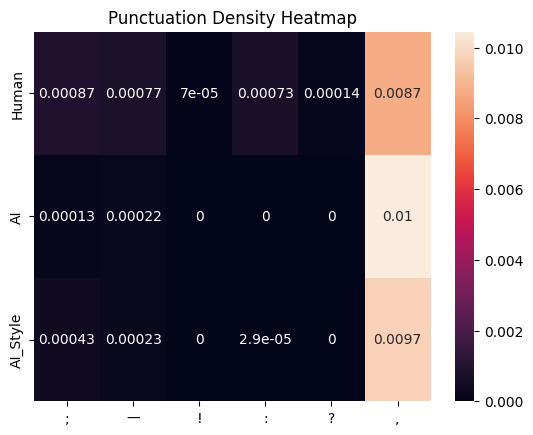

In [ ]:
punct_df = pd.DataFrame({
    k: [results["Human"][k], results["AI"][k], results["AI_Style"][k]]
    for k in PUNCT
}, index=["Human", "AI", "AI_Style"])

sns.heatmap(punct_df, annot=True)
plt.title("Punctuation Density Heatmap")
plt.show()


In [ ]:
import numpy as np

def tree_depth_stats(text):
    doc = nlp(text)
    depths = []

    for sent in doc.sents:
        depths.append(tree_depth(sent.root))

    return np.mean(depths), np.std(depths)

human_mean, human_std = tree_depth_stats(class1_sample)
ai_mean, ai_std = tree_depth_stats(class2_sample)
style_mean, style_std = tree_depth_stats(class3_sample)

depth_df = pd.DataFrame({
    "Mean Tree Depth": [human_mean, ai_mean, style_mean],
    "Std Dev Tree Depth": [human_std, ai_std, style_std]
}, index=["Human", "AI", "AI_Style"])

depth_df

,Mean Tree Depth,Std Dev Tree Depth
Human,7.542105,2.776938
AI,8.043902,2.086665
AI_Style,8.005000,1.845257


### Tier A

In [ ]:
def extract_features(text):
    out = {}
    out.update(lexical_metrics(text))
    out.update(syntactic_metrics(text))
    out.update(punctuation_density(text))
    out["flesch"] = readability(text)

    return out


Instead of finding metrics for only 5000 word sample, we opt to do it for all of the dataset.


In [ ]:
rows = []

# Class 1 (human)
for x in class1_freud_chunks + class1_james_chunks:
    feats = extract_features(clean_text(x["text"]))
    feats["label"] = "class1"
    rows.append(feats)

# Class 2
df2 = pd.read_csv("class2.csv")
for t in df2.text:
    feats = extract_features(clean_text(t))
    feats["label"] = "class2"
    rows.append(feats)

# Class 3
df3 = pd.read_csv("class3.csv")
for t in df3.text:
    feats = extract_features(clean_text(t))
    feats["label"] = "class3"
    rows.append(feats)

df = pd.DataFrame(rows)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(["label", "total_words"], axis=1)
y = LabelEncoder().fit_transform(df["label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       462
           1       0.82      0.65      0.73       101
           2       0.65      0.75      0.70        91

    accuracy                           0.90       654
   macro avg       0.82      0.80      0.80       654
weighted avg       0.91      0.90      0.90       654



### Tier B - The Semanticist


In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip


In [ ]:
# !pip install gensim

In [ ]:
from gensim.models import KeyedVectors

glove = KeyedVectors.load_word2vec_format("glove.6B.300d.txt", binary=False, no_header=True)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def embed_tfidf(text, row):
    words = text.split()
    vec = np.zeros(300)
    weight_sum = 0

    for w in words:
        if w in glove and w in vocab:
            idx = vocab[w]
            weight = tfidf[row, idx]
            vec += glove[w] * weight
            weight_sum += weight

    if weight_sum > 0:
        vec /= weight_sum

    return vec




In [ ]:
import numpy as np

In [ ]:
texts = []
labels = []

for x in class1_freud_chunks + class1_james_chunks:
    texts.append(clean_text(x["text"]))
    labels.append(0)

for t in df2.text:
    texts.append(clean_text(t))
    labels.append(1)

for t in df3.text:
    texts.append(clean_text(t))
    labels.append(2)



vectorizer = TfidfVectorizer(max_features=5000)
tfidf = vectorizer.fit_transform(texts)
vocab = vectorizer.vocabulary_

X = np.array([embed_tfidf(t,i) for i,t in enumerate(texts)])
y = np.array(labels)


In [ ]:
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)


In [ ]:
!pip install sympy==1.12


  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.12 which is incompatible.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:

class FFNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(300,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,64),
            nn.ReLU(),
            nn.Linear(64,3)
        )

    def forward(self,x):
        return self.net(x)

model = FFNN()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(30):
    opt.zero_grad()
    loss = loss_fn(model(X_train), y_train)
    loss.backward()
    opt.step()

model.eval()
with torch.no_grad():
    preds = model(X_test).argmax(dim=1)

print(classification_report(y_test.numpy(), preds.numpy()))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       454
           1       0.60      0.95      0.74        98
           2       1.00      0.01      0.02       102

    accuracy                           0.84       654
   macro avg       0.84      0.65      0.57       654
weighted avg       0.88      0.84      0.78       654



### Tier C

In [ ]:
from datasets import Dataset

data = {
    "text": texts,
    "label": labels
}

ds = Dataset.from_dict(data)

ds = ds.train_test_split(test_size=0.2, seed=42)

train_ds = ds["train"]
test_ds = ds["test"]


In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.5.1+cu121
True


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3
)


Loading weights: 100%|█| 100/100 [00:00<00:00, 370.48it/s, Materializing param=d
DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.bias    | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
classifier.bias         | MISSING    | 
pre_classifier.bias     | MISSING    | 
pre_classifier.weight   | MISSING    | 
classifier.weight       | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


In [ ]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_lin", "v_lin"],
    lora_dropout=0.1,
    bias="none",
    task_type="SEQ_CLS"
)

model = get_peft_model(model, config)


In [ ]:
def tok(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length")

train_ds = train_ds.map(tok, batched=True)
test_ds = test_ds.map(tok, batched=True)

train_ds.set_format(type="torch", columns=["input_ids","attention_mask","label"])
test_ds.set_format(type="torch", columns=["input_ids","attention_mask","label"])


Map: 100%|███████████████████████████| 654/654 [00:00<00:00, 1313.28 examples/s]


In [ ]:
print(test_ds.size)

In [ ]:
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)

    print(classification_report(labels, preds))

    return {
        "accuracy": accuracy_score(labels, preds)
    }

args = TrainingArguments(
    output_dir="./out",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    logging_steps=50,
    save_strategy="no",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)

trainer.train()

print("\nFinal Evaluation:")
trainer.evaluate()


Step,Training Loss
50,0.751151
100,0.306237
150,0.164853
200,0.140275
250,0.127789
300,0.124532
350,0.094152
400,0.091886
450,0.093125
500,0.099538



Final Evaluation:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       0.85      0.92      0.88       112
           2       0.91      0.84      0.87       112

    accuracy                           0.96       654
   macro avg       0.92      0.92      0.92       654
weighted avg       0.96      0.96      0.96       654



{'eval_loss': 0.09330801665782928,
 'eval_accuracy': 0.9587155963302753,
 'eval_runtime': 24.4968,
 'eval_samples_per_second': 26.697,
 'eval_steps_per_second': 3.347,
 'epoch': 2.0}

### Task 3 - The Smoking Gun


In [ ]:
!pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.2 MB/s  0:00:00

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
import torch

model.eval()

outputs = trainer.predict(test_ds)

logits = outputs.predictions
labels = outputs.label_ids
preds = np.argmax(logits, axis=1)
probs = torch.softmax(torch.tensor(logits), dim=1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       0.85      0.92      0.88       112
           2       0.91      0.84      0.87       112

    accuracy                           0.96       654
   macro avg       0.92      0.92      0.92       654
weighted avg       0.96      0.96      0.96       654



In [ ]:
# to make it less confusing
HUMAN = 0
AI_1 = 1
AI_2 = 2

In [ ]:
# Let's see what the model actually did
from collections import Counter

pairs = Counter(zip(labels, preds))
pairs


Counter({(0, 0): 430, (1, 1): 103, (2, 2): 94, (2, 1): 18, (1, 2): 9})